<a href="https://colab.research.google.com/github/saqquib/Bank-Marketing-Effectiveness-Prediction/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
# importing the required libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# **Importing and Loading data**

In [2]:
# Mounting the Drive first
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading and reading the dataset
data=pd.read_csv('/content/drive/My Drive/csv files caps3/bank-full.csv',sep=';')
df = data.copy()

In [4]:
#Checking the head and tail of the data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
# Shape of the Dataset(Row,Column)
df.shape

(45211, 17)


*   We have 45211 rows and 17 columns in our dataset.

In [7]:
# Basic information about dataset like null values , datatype , number of rows & column etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### **Checking null values**

In [9]:
# check null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


 *   **There is no null values present in the dataset**.

In [10]:
# checking unique values
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [11]:
# checking the duplicate values in our data
df.duplicated().value_counts()

False    45211
dtype: int64



*   **There is no duplicate values present in the dataset**



## **DESCRIPTIVE ANALYSIS**


* We have two types of variables in our data set.

i) Continuous Variables

ii) Categorical Variables.




In [13]:
# some important statistical description of feature in our dataset
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [14]:
# List of Categorical feature
categorical_feature = list(df.select_dtypes(include=['object']))
categorical_feature

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [16]:
# List of continuous feature
continuous_feature = list(df.select_dtypes(exclude=['object']))
continuous_feature

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# **EXPLORATORY DATA ANALYSIS (EDA)**

##**Target Variable**

Important thing to make sure before feeding our data into the model is the class distribution of the data. In our case where the expected class are divided into two outcome, 'yes' and 'no', a class distribution of 50:50 is considered ideal

Let’s see how our target variable i.e. y distribution looks like.

Target Variable : y - has the client subscribed a term deposit? (binary: 'yes','no')

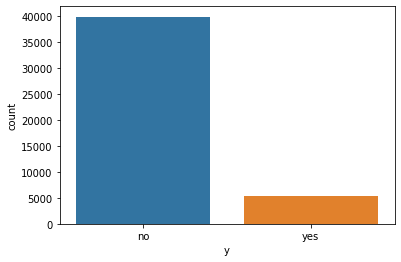

In [17]:
# Visualize the target variable
g = sns.countplot(df['y'])

**As We Can See that Data is highly imbalanced.Majority of the data points belong to no class. Ratio of No class to yes class is 8:1**

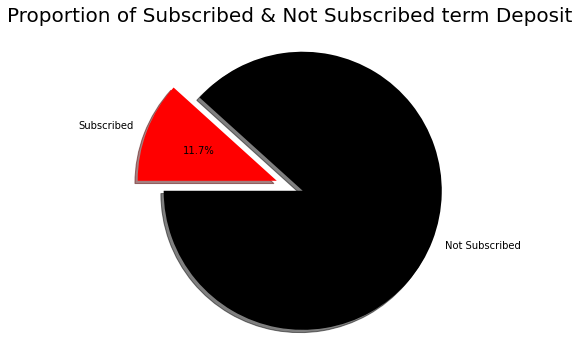

In [18]:
# visualize how many customers have subscribed

labels = 'Not Subscribed', 'Subscribed' 
sizes = df.y.value_counts()
colors = ['black', 'red']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Proportion of Subscribed & Not Subscribed term Deposit",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

**Only 11.7% people have subscribed our product**

## **UNIVARIATE ANALYSIS**

Let’s start doing EDA on rest of the columns of the datapoints.

###**Categorical Features Exploration**

Column name :  job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


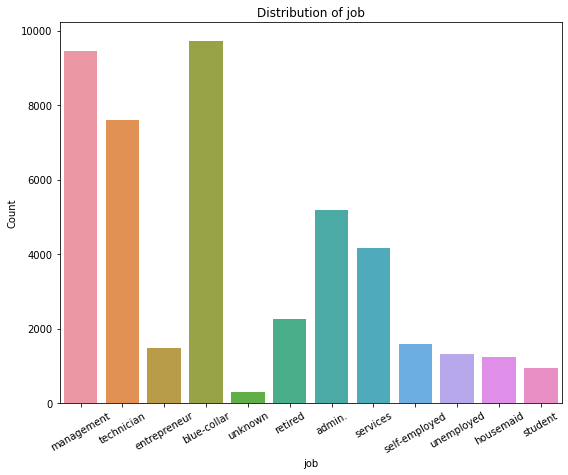

Column name :  marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


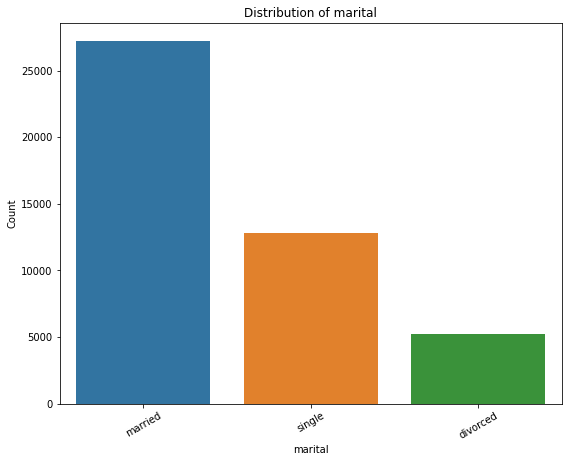

Column name :  education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


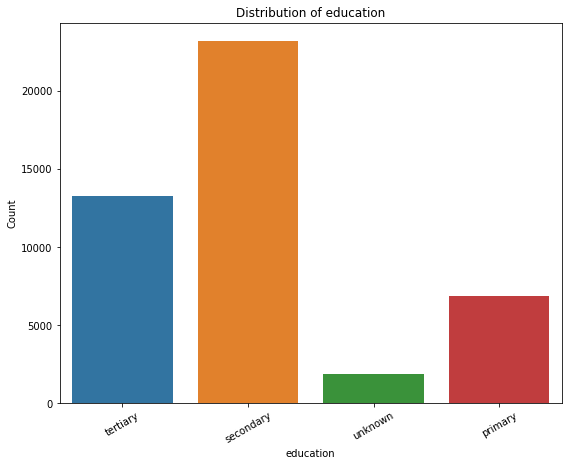

Column name :  default
no     44396
yes      815
Name: default, dtype: int64


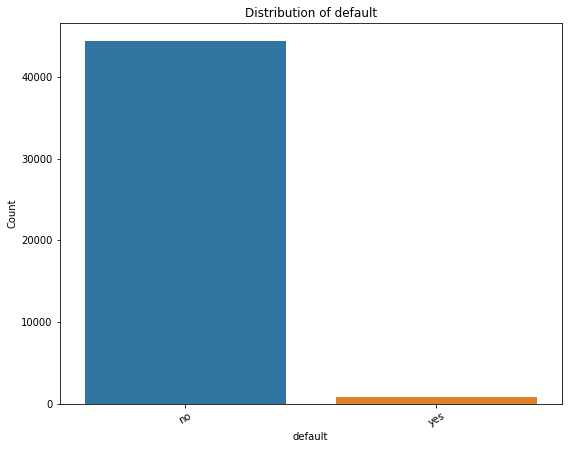

Column name :  housing
yes    25130
no     20081
Name: housing, dtype: int64


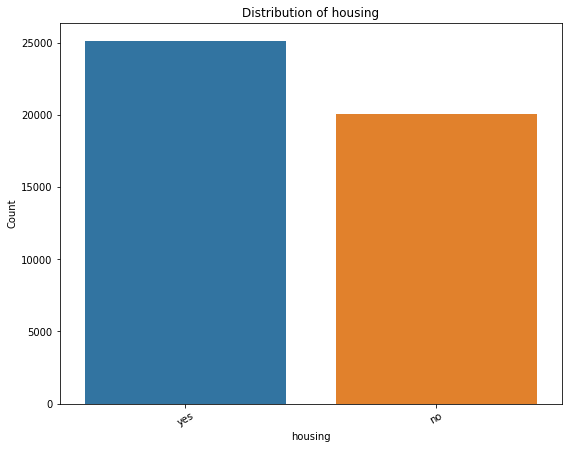

Column name :  loan
no     37967
yes     7244
Name: loan, dtype: int64


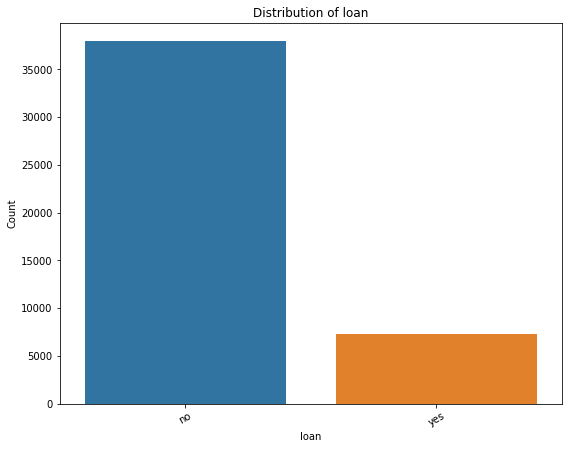

Column name :  contact
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


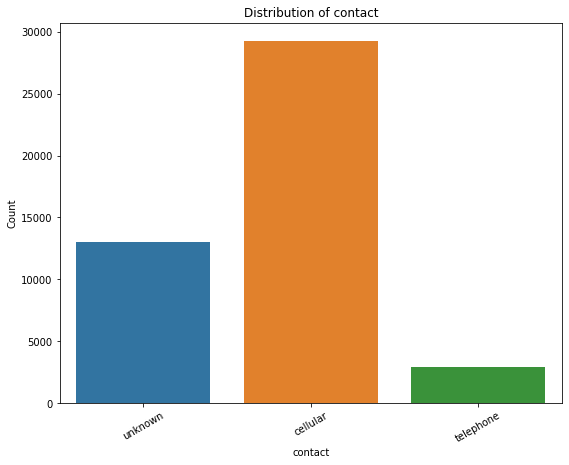

Column name :  month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


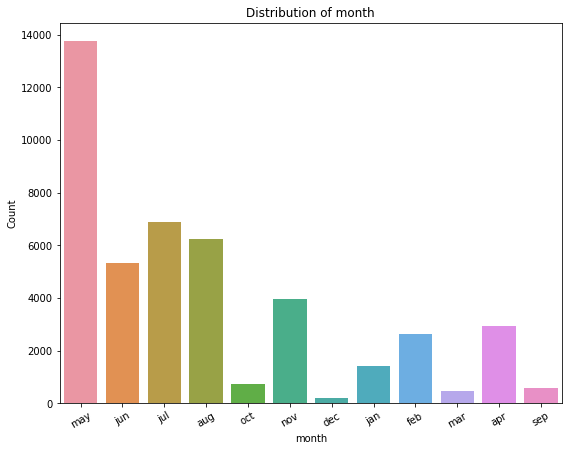

Column name :  poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


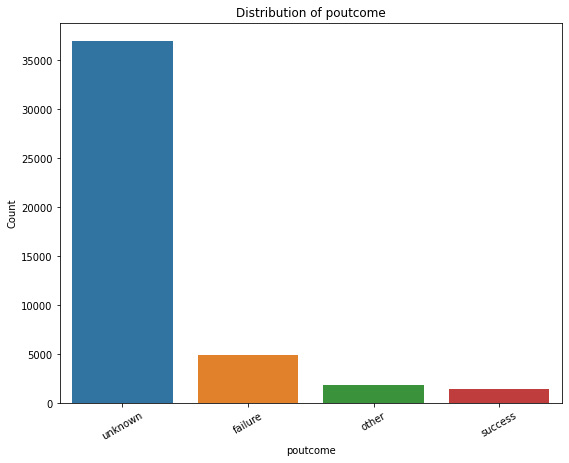

Column name :  y
no     39922
yes     5289
Name: y, dtype: int64


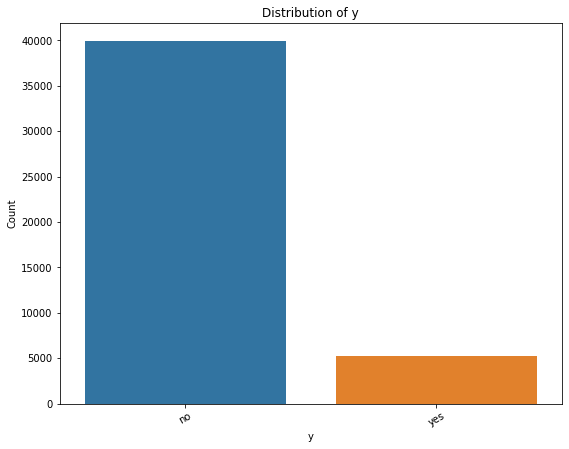

In [19]:
#Countplot of categorical features
for col in categorical_feature:
  print('Column name : ' , col)
  print(data[col].value_counts())
  plt.figure(figsize=(9,7))
  sns.countplot(x = data[col])
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.title("Distribution of {}".format(col))
  plt.xticks(rotation=30)
  plt.show()

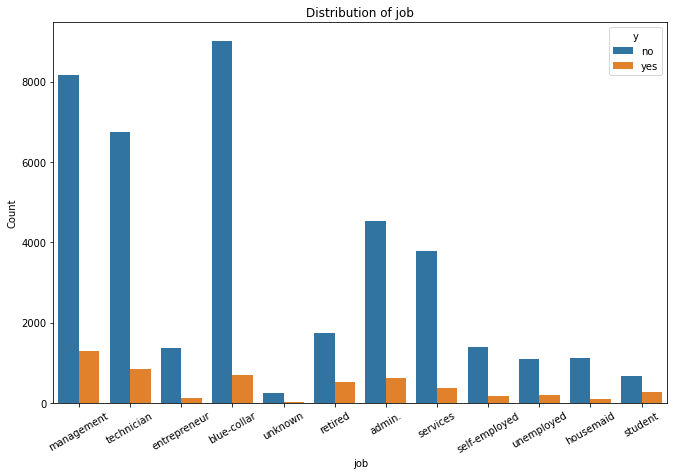

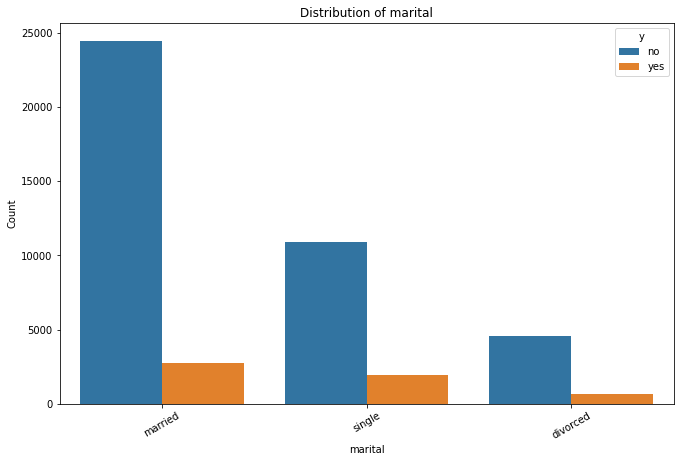

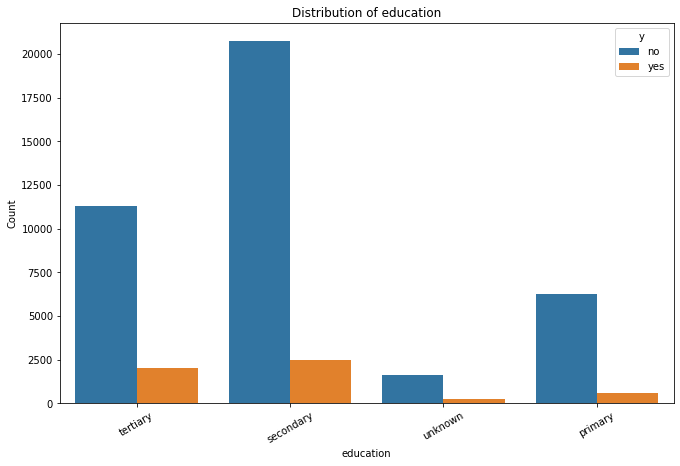

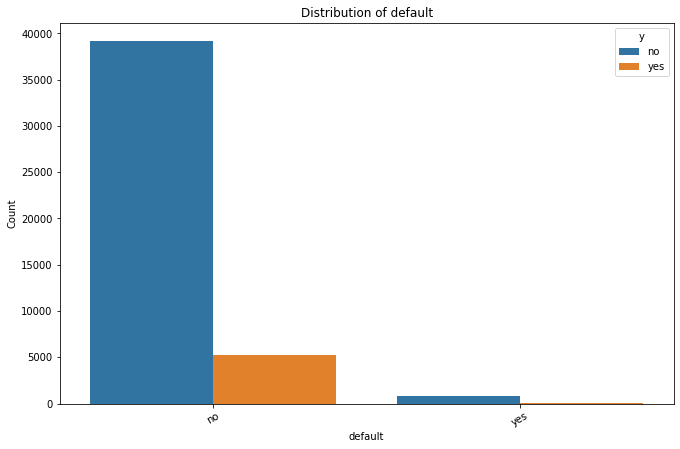

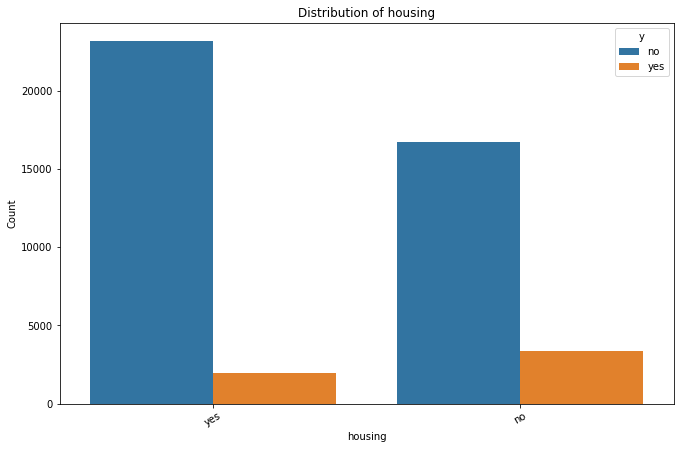

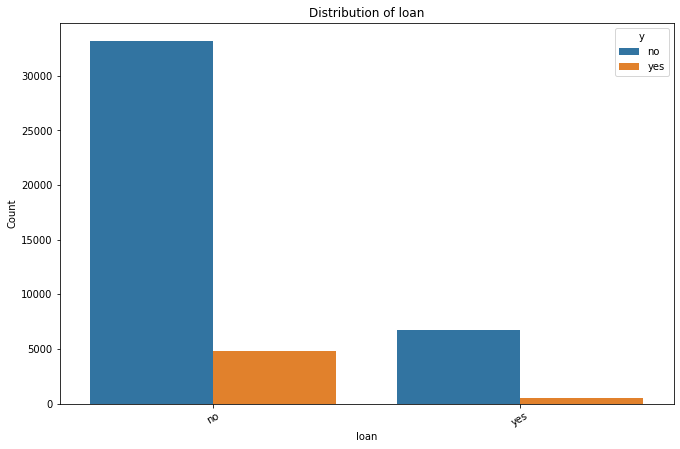

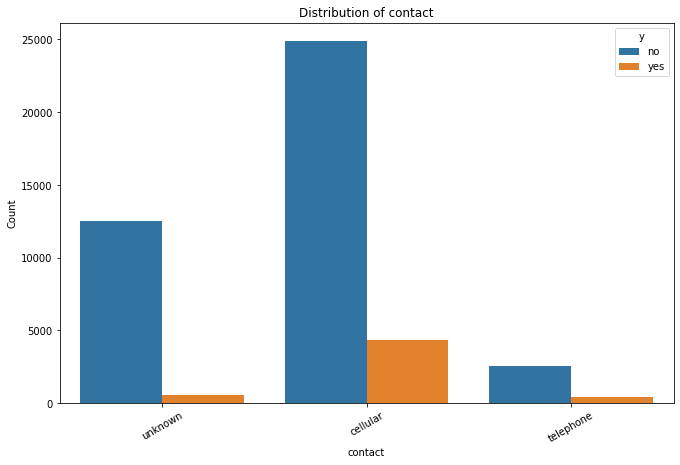

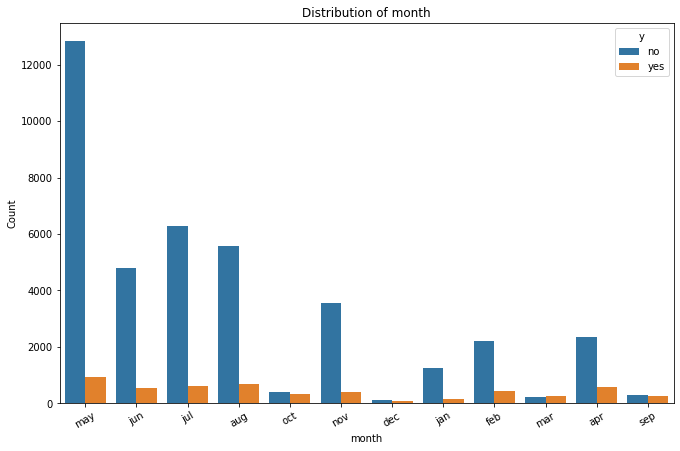

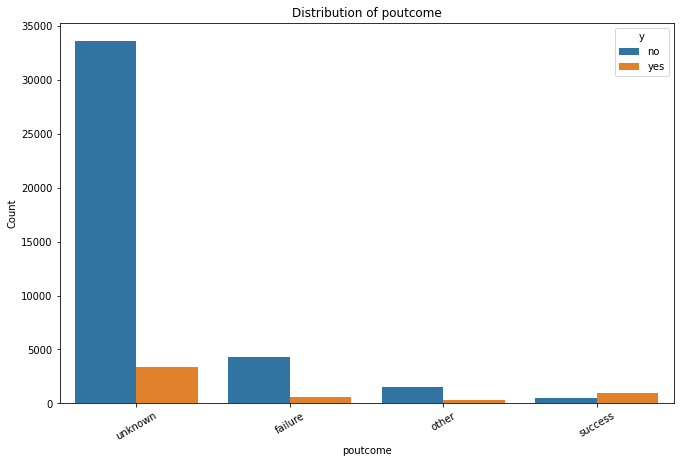

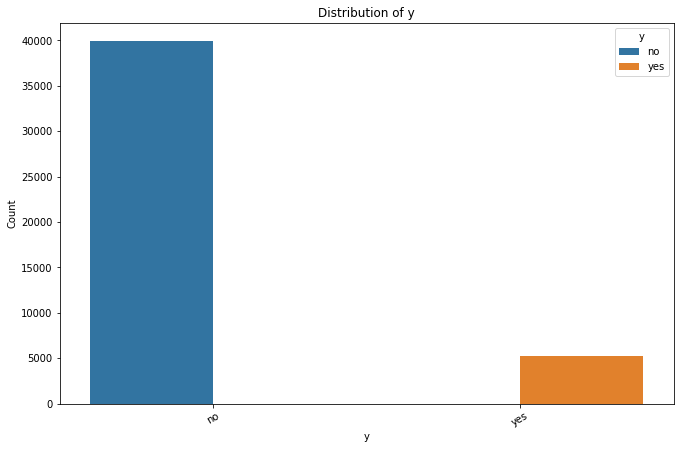

In [20]:
#Countplot of categorical features
for col in categorical_feature:
  plt.figure(figsize=(11,7))
  sns.countplot(x = data[col] , hue=data['y'])
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.title("Distribution of {}".format(col))
  plt.xticks(rotation=30)
  plt.show()

### **From the above plots we can analyze that:**

- Top contacted clients are from job type: 'blue-collar', 'management' & 'technician'.

- Success rate is highest for student.

- Most of the people who are contacted have tertiary or secondary education.


- Most of the clients contacted have previous outcome as 'unknown'.

- Most of the people are contacted through cellular.

- Most of the clients (approx 1/3 of total) are contacted in the month of May but the success rate is only 6.7%.

- Very few clients are contacted who are defaulter.

- March has highest success rate.


- As seen for default variable, less client are contacted who have loan.


- As we can see that married people are more tend to invest in product and have subscribed more in comparison to others